In [185]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import os
os. environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#TF_CPP_MIN_LOG_LEVEL: 텐서 플로우 로그
#0: 모든 로그 출력(default)
#1: INFO 로그 필터
#2: INFO, WARNING 로그 필터
#3: INFO, WARNING, ERROR 로그 필터

import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [186]:
iris = datasets.load_iris()
# iris data 불러오기
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data[:100, :3], iris.target[:100], test_size = 0.6, random_state = 42)
#test_size: iris.data와 iris.target의 데이터 중 60%를 X_test와 y_test에 분배, 나머지 40%를 X_train과 y_train에 분배
#random_state: iris.data, iris.target의 데이터를 랜덤으로 믹스
# 즉, 데이터를 랜덤하게 섞은 후 test_size = 0.6에 맞춰서 분배

In [187]:
iris_Data = iris.data

In [188]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [189]:
svm = svm.SVC(kernel = "linear", C = 1, gamma = 10)
#kernel: 선형 커널(linear kernel)
#C: 오류의 허용치(큼 -> 하드마진, 작음 -> 소프트 마진)
#gamma: 결정 경계의 유연함(C와 유사), 훈련 데이터에 민감하게 반응하는 정도

svm.fit(X_train, y_train) #train 데이터를 이용한 SVM 훈련
predictions = svm.predict(X_test) #훈련된 모델(svm.fit)을 이용한 test 데이터 예측
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'. format(score))

정확도: 1.000000


In [190]:
w = svm.coef_[0]
b = svm.intercept_[0]

print(f"w = {w}, b = {b}")

w = [ 0.09735458 -0.53971346  1.20560608], b = -1.764355582425311


In [191]:
h = 0.01
x_min, x_max = X_test[:, 0].min()-1 , X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min()-1 , X_test[:, 1].max() + 1
z_min, z_max = X_test[:, 2].min()-1 , X_test[:, 2].max() + 1
#데이터가 그래프에 가려지지 안도록 그래프의 크기 조절
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), np.arange(z_min, z_max,h))

z = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

In [192]:
x_axis = np.linspace(x_min, x_max, 100)
y_axis = np.linspace(y_min, y_max, 100)
x_axis, y_axis = np.meshgrid(x_axis, y_axis)
z_axis = -(w[0]/w[2])*x_axis -(w[1]/w[2])*y_axis - (b/w[2])

margin_up = -(w[0]/w[2])*x_axis -(w[1]/w[2])*y_axis - ((-1+b)/w[2])
margin_down = -(w[0]/w[2])*x_axis -(w[1]/w[2])*y_axis - ((+1+b)/w[2])

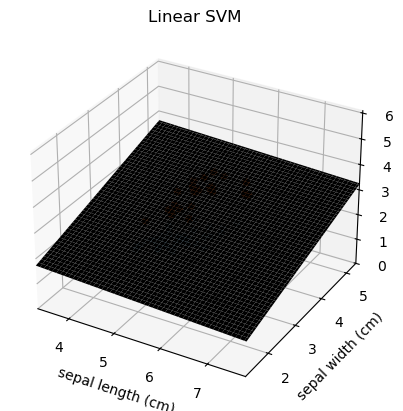

In [197]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:,2], c=y_test, cmap=plt.cm.Paired)
ax.plot_surface(x_axis, y_axis, z_axis, color = "black", alpha = 1)

ax.set_title('Linear SVM')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(zz.min(), zz.max())

plt.show()

In [ ]:
fig = px.scatter_3d(
    x = X_test[:, 0],
    y = X_test[:, 1],
    z = X_test[:, 2],
    color=y_test.astype(str),   # 문자열 → 범주형
    color_discrete_sequence=["blue", "red"],
    labels = dict(
    x = iris.feature_names[0],
    y = iris.feature_names[1],
    z = iris.feature_names[2]
    )
)

fig.update_traces(marker_size=1, selector=dict(type="scatter3d"))
fig.update_layout(coloraxis_showscale=False)

fig.add_trace(
    go.Surface(
        x = x_axis,
        y = y_axis,
        z = z_axis,
        colorscale = [[0, "green"]],
        showscale = False
    )
)
fig.add_trace(
    go.Surface(
        x = x_axis,
        y = y_axis,
        z = margin_up,
        opacity=0.0,
        showscale = False,
        contours=dict(
            x=dict(show=True, color="blue", width=1),
            y=dict(show=True, color="blue", width=1)
        )
    )
)
fig.add_trace(
    go.Surface(
        x = x_axis,
        y = y_axis,
        z = margin_down,
        opacity=0.0,
        showscale = False,
        contours=dict(
            x=dict(show=True, color="red", width=1),
            y=dict(show=True, color="red", width=1)
        )
    )
)

fig.show()